In [3]:
import json
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# load dataset
with open("dataset.json") as file:
    data = json.load(file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
import re
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import string

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Pretvaranje u mala slova
    text = text.lower()

    # Uklanjanje brojeva
    text = re.sub(r'\d+', '', text)

    # Uklanjanje znakova interpunkcije
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenizacija teksta
    tokens = word_tokenize(text)

    # Lematizacija i stemming
    tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]

    # Uklanjanje stop riječi
    tokens = [token for token in tokens if token not in stop_words]

    # Spajanje tokena u rekonstruirani tekst
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Učitavanje dataseta
with open('dataset.json') as file:
    dataset = json.load(file)

pat = []
res = []

# Preprocesiranje podataka
for intent in dataset['intents']:
    patterns = intent['patterns']
    responses = intent['responses']

    # Preprocesiranje uzoraka
    preprocessed_patterns = [preprocess_text(pattern) for pattern in patterns]
    pat.append(preprocessed_patterns)

    # Preprocesiranje odgovora
    preprocessed_responses = [preprocess_text(response) for response in responses]
    res.append(preprocessed_responses)

# Ispis preprocesiranog dataseta
print(pat)
print(res)

[['hello', 'hi', 'hey', 'good morn', 'good afternoon', 'good even'], ['thank', 'thank', 'thank lot', 'thank much', 'appreci'], ['goodby', 'bye', 'see later', 'talk soon'], ['place order', 'process order', 'help place order', 'long doe take receiv order', 'statu order', 'problem order'], ['pay order', 'payment method accept', 'safe make payment websit', 'problem payment', 'payment process'], ['return polici', 'return item', 'get refund', 'receiv damag item', 'receiv wrong item'], ['contact custom support', 'need help issu', 'question', 'help someth']]
[['hi help today', 'hello assist', 'hi help today', 'hey assist', 'good morningafternooneven may help', 'hello may assist today'], ['welcom', 'problem', 'glad help', 'anytim', 'pleasur', 'problem', 'wa pleasur assist'], ['goodby great day', 'bye take care', 'see later', 'talk soon', 'great day'], ['place order plea visit websit select item wish purchas standard deliveri time busi day check statu order log account websit ani issu order plea

In [ ]:
lemmatizer = WordNetLemmatizer()

categories = []
words = []
classes = []
doc1 = []
doc2 = []

# preprocess patterns and responses for each intent
for intent in data["intents"]:
    categories.append(intent["tag"])
    for pattern in intent["patterns"]:
        words_in_pattern = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(pattern)]
        words.extend(words_in_pattern)
        doc1.append(pattern)
        doc2.append(intent["tag"])
        
    for response in intent["responses"]:
        words_in_response = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(response)]
        words.extend(words_in_response)

    if intent["tag"] not in classes:
        classes.append(intent["tag"])

words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [5]:
print(categories)

['greeting', 'thanks', 'goodbye', 'order', 'payment', 'returns', 'support']


In [6]:
print(words)

['!', "'ll", "'re", "'s", '(', ')', ',', '-', '.', '/', ':', '?', '[', ']', 'accept', 'account', 'afternoon', 'allow', 'am-pm', 'anyth', 'anytim', 'appl', 'appreci', 'assist', 'attach', 'avail', 'best', 'busi', 'bye', 'call', 'card', 'care', 'case', 'certainli', 'chat', 'check', 'complet', 'concern', 'contact', 'credit', 'custom', 'damag', 'day', 'debit', 'deliveri', 'elig', 'email', 'email/phon', 'encount', 'encrypt', 'estim', 'even', 'fill', 'follow', 'form', 'get', 'glad', 'good', 'goodby', 'great', 'guid', 'happi', 'hello', 'help', 'hesit', 'hey', 'hi', 'hour', 'includ', 'incorrect', 'inform', 'initi', 'instruct', 'issu', 'item', 'know', 'label', 'later', 'let', 'like', 'live', 'log', 'long', 'lot', 'make', 'may', 'method', 'morn', 'morning/afternoon/even', 'much', "n't", 'need', 'number', 'onlin', 'option', 'order', 'origin', 'pack', 'packag', 'pay', 'payment', 'paypal', 'phone', 'place', 'pleas', 'pleasur', 'polici', 'problem', 'process', 'provid', 'pst', 'purchas', 'question', '

In [7]:
print(classes)

['goodbye', 'greeting', 'order', 'payment', 'returns', 'support', 'thanks']


In [8]:
print(doc1)

['hello', 'hi', 'hey', 'good morning', 'good afternoon', 'good evening', 'thank you', 'thanks', 'thanks a lot', 'thank you so much', 'appreciate it', 'goodbye', 'bye', 'see you later', 'talk to you soon', 'how do i place an order?', 'what is the process for ordering?', 'can you help me with placing an order?', 'how long does it take to receive an order?', 'what is the status of my order?', 'i have a problem with my order', 'how can i pay for my order?', 'what payment methods do you accept?', 'is it safe to make a payment on your website?', 'i have a problem with my payment', 'when will my payment be processed?', 'what is your return policy?', 'how do i return an item?', 'can i get a refund?', 'i received a damaged item', 'i received the wrong item', 'how can i contact customer support?', 'i need help with an issue', 'i have a question', 'can you help me with something?']


In [9]:
print(doc2)

['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'thanks', 'thanks', 'thanks', 'thanks', 'thanks', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'order', 'order', 'order', 'order', 'order', 'order', 'payment', 'payment', 'payment', 'payment', 'payment', 'returns', 'returns', 'returns', 'returns', 'returns', 'support', 'support', 'support', 'support']


In [ ]:
import random
import numpy as np

training = []
out_empty = [0] * len(classes)

for idx, doc in enumerate(doc1):
  bow = []
  text = lemmatizer.lemmatize(doc.lower())
  for word in words:
    bow.append(1) if word in text else bow.append(0)

  output_row = list(out_empty)
  output_row[classes.index(doc2[idx])] = 1
  training.append([bow, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))


In [ ]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista podataka za treniranje
training = []
doc_labels = []

# Kreiranje korpusa
corpus = []
for idx, doc in enumerate(doc1):
    text = lemmatizer.lemmatize(doc.lower())
    corpus.append(text)
    doc_labels.append(doc2[idx])

# Kreiranje TD-IDF modela
vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
train_X = vectorizer.fit_transform(corpus)
train_y = doc_labels


In [ ]:
print(train_X)

  (0, 19)	1.0
  (1, 22)	1.0
  (2, 21)	1.0
  (3, 35)	0.7725740835653588
  (3, 16)	0.6349246297027276
  (4, 2)	0.7725740835653588
  (4, 16)	0.6349246297027276
  (5, 13)	0.7725740835653588
  (5, 16)	0.6349246297027276
  (6, 75)	0.5835285995321211
  (6, 65)	0.8120925892581963
  (7, 66)	1.0
  (8, 31)	0.6716531149994628
  (8, 0)	0.4323163667664637
  (8, 66)	0.6016516036190404
  (9, 36)	0.5575626615972058
  (9, 58)	0.5575626615972058
  (9, 75)	0.358880884675918
  (9, 65)	0.49945196705940614
  (10, 27)	0.6349246297027276
  (10, 4)	0.7725740835653588
  (11, 17)	1.0
  (12, 6)	1.0
  (13, 29)	0.6435829408460239
  (13, 57)	0.6435829408460239
  :	:
  (30, 28)	0.4428296096001545
  (30, 67)	0.4428296096001545
  (30, 24)	0.2906669950808582
  (31, 62)	0.48107436488081523
  (31, 9)	0.48107436488081523
  (31, 8)	0.48107436488081523
  (31, 7)	0.34522251268993887
  (31, 24)	0.2595095370649232
  (31, 23)	0.34522251268993887
  (32, 26)	0.5002302731729997
  (32, 38)	0.5002302731729997
  (32, 73)	0.358968933776

In [ ]:
bow

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0]

In [ ]:
from nltk.tokenize import word_tokenize

# Prikupljanje pitanja i odgovora iz podataka
text = data['intents']
questions = []
answers = []

for intent in text:
  for pattern in intent['patterns']:
    questions.append(pattern)
  for pattern in intent['responses']:
    answers.append(pattern)

### One-hot enkodiranje

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import OneHotEncoder
import itertools

tokens_q = [doc.split(" ") for doc in questions]

# stvaranje liste tokena i kreiranje riječnika koji mapira riječ u id riječi,
all_tokens = itertools.chain.from_iterable(tokens_q)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}
print(word_to_id)

token_ids = np.zeros((len(questions), len(word_to_id)))
for i, sentence in enumerate(questions):
    for word in sentence.split():
        token_ids[i, word_to_id[word]] = 1

# pretvaranje token-id liste u one-hot reprezentaciju
vec=OneHotEncoder()
X = vec.fit_transform(token_ids).toarray()
print(X)

{'evening': 0, 'pay': 1, 'item': 2, 'item?': 3, 'will': 4, 'be': 5, 'later': 6, 'something?': 7, 'to': 8, 'much': 9, 'you': 10, 'it': 11, 'What': 12, 'safe': 13, 'receive': 14, 'get': 15, 'Hello': 16, 'question': 17, 'take': 18, 'your': 19, 'Thanks': 20, 'Talk': 21, 'Hi': 22, 'Hey': 23, 'does': 24, 'Can': 25, 'place': 26, 'me': 27, 'order?': 28, 'status': 29, 'processed?': 30, 'make': 31, 'issue': 32, 'customer': 33, 'I': 34, 'problem': 35, 'Thank': 36, 'need': 37, 'Bye': 38, 'a': 39, 'damaged': 40, 'received': 41, 'Appreciate': 42, 'refund?': 43, 'long': 44, 'accept?': 45, 'policy?': 46, 'afternoon': 47, 'an': 48, 'Goodbye': 49, 'have': 50, 'support?': 51, 'process': 52, 'Good': 53, 'Is': 54, 'website?': 55, 'morning': 56, 'can': 57, 'help': 58, 'with': 59, 'payment': 60, 'the': 61, 'of': 62, 'my': 63, 'methods': 64, 'wrong': 65, 'order': 66, 'on': 67, 'placing': 68, 'See': 69, 'soon': 70, 'is': 71, 'How': 72, 'ordering?': 73, 'return': 74, 'so': 75, 'contact': 76, 'do': 77, 'for': 78

In [ ]:
tokens_a = [doc.split(" ") for doc in answers]

# stvaranje liste tokena i kreiranje riječnika koji mapira riječ u id riječi,
all_tokens = itertools.chain.from_iterable(tokens_a)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}
print(word_to_id)

token_ids = np.zeros((len(answers), len(word_to_id)))
for i, sentence in enumerate(answers):
    for word in sentence.split():
        token_ids[i, word_to_id[word]] = 1

# pretvaranje token-id liste u one-hot reprezentaciju
vec=OneHotEncoder()
X = vec.fit_transform(token_ids).toarray()
print(X)

{'options': 0, 'Bye,': 1, 'cards,': 2, 'pleasure!': 3, 'transactions': 4, 'pay': 5, 'phone,': 6, 'assist': 7, 'item': 8, 'concerns': 9, 'Certainly,': 10, 'credit': 11, 'assistance': 12, 'welcome!': 13, 'encounter': 14, 'will': 15, 'be': 16, 'Glad': 17, 'to': 18, 'through': 19, 'wish': 20, 'allows': 21, 'In': 22, 'assistance,': 23, 'you': 24, 'payment,': 25, 'it': 26, 'instructions:': 27, 'later!': 28, 'number': 29, 'happy': 30, "You're": 31, 'item,': 32, 'The': 33, 'email,': 34, 'hesitate': 35, 'receive': 36, 'To': 37, 'take': 38, 'Hello,': 39, 'your': 40, 'out.': 41, 'are': 42, 'email': 43, 'pack': 44, "we're": 45, 'Talk': 46, 'refund': 47, 'Refunds': 48, 'Hi': 49, '14': 50, 'Hi!': 51, 'Hey': 52, 'may': 53, 'form': 54, '(9am-5pm': 55, '3-5': 56, '7-10': 57, 'you!': 58, 'items': 59, 'Your': 60, 'questions': 61, '24/7': 62, 'delivery': 63, 'problems': 64, 'place': 65, 'PayPal,': 66, 'please': 67, 'case': 68, 'processed': 69, 'email.': 70, 'information': 71, 'website': 72, 'Hello!': 73, 

### Bag of Words

In [ ]:
#Izgradnja BOW reprezentacije za korpus
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(questions)

#Prikaz dobijenog vokabulara
print(" Vokabular je:", count_vect.vocabulary_)

#Ispis kodiranih vektora
for sentence, vector in zip(questions, bow_rep):
    print(f'Rečenica: {sentence}')
    print(f'BoW: {vector.toarray()}\n')

 Vokabular je: {'hello': 18, 'hi': 21, 'hey': 20, 'good': 15, 'morning': 33, 'afternoon': 1, 'evening': 12, 'thank': 63, 'you': 73, 'thanks': 64, 'lot': 29, 'so': 56, 'much': 34, 'appreciate': 3, 'it': 25, 'goodbye': 16, 'bye': 5, 'see': 55, 'later': 27, 'talk': 62, 'to': 66, 'soon': 58, 'how': 22, 'do': 10, 'place': 43, 'an': 2, 'order': 39, 'what': 68, 'is': 23, 'the': 65, 'process': 47, 'for': 13, 'ordering': 40, 'can': 6, 'help': 19, 'me': 31, 'with': 71, 'placing': 44, 'long': 28, 'does': 11, 'take': 61, 'receive': 50, 'status': 59, 'of': 37, 'my': 35, 'have': 17, 'problem': 46, 'pay': 41, 'payment': 42, 'methods': 32, 'accept': 0, 'safe': 54, 'make': 30, 'on': 38, 'your': 74, 'website': 67, 'when': 69, 'will': 70, 'be': 4, 'processed': 48, 'return': 53, 'policy': 45, 'item': 26, 'get': 14, 'refund': 52, 'received': 51, 'damaged': 9, 'wrong': 72, 'contact': 7, 'customer': 8, 'support': 60, 'need': 36, 'issue': 24, 'question': 49, 'something': 57}
Rečenica: Hello
BoW: [[0 0 0 0 0 0

In [ ]:
#Izgradnja BOW reprezentacije za korpus
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(answers)

#Prikaz dobijenog vokabulara
print(" Vokabular je:", count_vect.vocabulary_)

#Ispis kodiranih vektora
for sentence, vector in zip(answers, bow_rep):
    print(f'Rečenica: {sentence}')
    print(f'BoW: {vector.toarray()}\n')

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicijalizacija TF-IDF vektorizatora
vectorizer = TfidfVectorizer()

# Izračunavanje TF-IDF vektora
tfidf_matrix = vectorizer.fit_transform(questions)

# Pretvaranje rijetke matrice u gusto oblik
tfidf_matrix = tfidf_matrix.toarray()

# Ispis vektora
for i, document in enumerate(questions):
  print("\nRečenica: ", questions[i])
  print(tfidf_matrix[i])


Rečenica:  Hello
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]

Rečenica:  Hi
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]

Rečenica:  Hey
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]

Rečenica:  Good morning
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.63492463 0.         0.
 0.         0.         0.         0.         0.         0.


In [ ]:
# Inicijalizacija TF-IDF vektorizatora
vectorizer = TfidfVectorizer()

# Izračunavanje TF-IDF vektora
tfidf_matrix = vectorizer.fit_transform(answers)

# Pretvaranje rijetke matrice u gusto oblik
tfidf_matrix = tfidf_matrix.toarray()

# Ispis vektora
for i, document in enumerate(answers):
  print("\nRečenica: ", answers[i])
  print(tfidf_matrix[i])

### Word2Vec

In [ ]:
pip install gensim nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenizacija teksta
tokenizirani_dokumenti = [word_tokenize(dokument.lower()) for dokument in questions]

# Izgradnja modela Word2Vec
model = Word2Vec(tokenizirani_dokumenti, vector_size=100, window=5, min_count=1, workers=4)

# Prikaz riječi i njihovih vektora
for riječ in model.wv.key_to_index:
    vektor = model.wv[riječ]
    print("Riječ:", riječ, "Vektor:", vektor)


Riječ: ? Vektor: [-5.7473348e-04  2.9108051e-04  5.1685739e-03  9.0213399e-03
 -9.3021812e-03 -7.1632895e-03  6.4638359e-03  9.0673752e-03
 -5.0980658e-03 -3.8141571e-03  7.3799896e-03 -1.5796691e-03
 -4.5185648e-03  6.5637925e-03 -4.8623006e-03 -1.8284213e-03
  2.9012456e-03  1.0004265e-03 -8.3723553e-03 -9.5402515e-03
  7.3286504e-03  5.0450275e-03  6.8613207e-03  7.1597856e-04
  6.3685193e-03 -3.3728650e-03 -9.8623510e-04  5.7716439e-03
 -7.5280908e-03 -3.8967407e-03 -7.4565159e-03 -9.5524377e-04
  9.5976489e-03 -7.4147731e-03 -2.3141201e-03 -1.9039579e-03
  8.1073213e-03 -5.9293713e-03  3.8462829e-05 -4.8163733e-03
 -9.6038813e-03  4.9596936e-03 -8.7719215e-03 -4.3551670e-03
 -4.6320696e-05 -3.7049330e-04 -7.6616122e-03  9.5607052e-03
  4.9635693e-03  9.2547555e-03 -8.0931727e-03  4.4709728e-03
 -4.1944082e-03  7.9676631e-04  8.4696235e-03 -4.4974275e-03
  4.5529348e-03 -6.7726299e-03 -3.5922970e-03  9.3887262e-03
 -1.5568096e-03  3.3150104e-04 -4.1399146e-03 -7.6674484e-03
 -1.538

In [ ]:
# Izgradnja matrice sličnosti
broj_rijeci = len(model.wv.key_to_index)
similarity_matrix = np.zeros((broj_rijeci, broj_rijeci))

for i, rijec1 in enumerate(model.wv.index_to_key):
    for j, rijec2 in enumerate(model.wv.index_to_key):
        similarity_matrix[i, j] = model.wv.similarity(rijec1, rijec2)

rijeci = model.wv.index_to_key
df = pd.DataFrame(similarity_matrix, index=rijeci, columns=rijeci)
styled_df = df.style.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styled_df

In [ ]:
# Tokenizacija teksta
tokenizirani_dokumenti = [word_tokenize(dokument.lower()) for dokument in answers]

# Izgradnja modela Word2Vec
model = Word2Vec(tokenizirani_dokumenti, vector_size=100, window=5, min_count=1, workers=4)

# Prikaz riječi i njihovih vektora
for riječ in model.wv.key_to_index:
    vektor = model.wv[riječ]
    print("Riječ:", riječ, "Vektor:", vektor)

In [ ]:
# Izgradnja matrice sličnosti
broj_rijeci = len(model.wv.key_to_index)
similarity_matrix = np.zeros((broj_rijeci, broj_rijeci))

for i, rijec1 in enumerate(model.wv.index_to_key):
    for j, rijec2 in enumerate(model.wv.index_to_key):
        similarity_matrix[i, j] = model.wv.similarity(rijec1, rijec2)

rijeci = model.wv.index_to_key
df = pd.DataFrame(similarity_matrix, index=rijeci, columns=rijeci)
styled_df = df.style.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styled_df

### Fast text

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

# Ručno kreiran dokument
document = questions

# Tokenizacija dokumenta
tokenized_document = [doc.split() for doc in document]

# Inicijalizacija FastText modela
model = FastText(vector_size=100, window=5, min_count=1, workers=4)

# Treniranje modela
model.build_vocab(corpus_iterable=tokenized_document)
model.train(corpus_iterable=tokenized_document, total_examples=len(tokenized_document), epochs=100)

(5444, 15700)

In [ ]:
word = 'process'
# Pronalaženje najsličnijih riječi
similar_words = model.wv.most_similar(word)
print(f"Najsličnije riječi za '{word}': {similar_words}")

Najsličnije riječi za 'process': [('processed?', 0.9199726581573486), ('payment', 0.8016743063926697), ('ordering?', 0.7820302844047546), ('order?', 0.7658452987670898), ('What', 0.7481674551963806), ('order', 0.7403881549835205), ('website?', 0.7266000509262085), ('your', 0.7029959559440613), ('received', 0.6907960176467896), ('receive', 0.6850530505180359)]


## Algoritmi

## 1) RNN

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Test Loss: 2.150078058242798
Test Accuracy: 0.6666666865348816


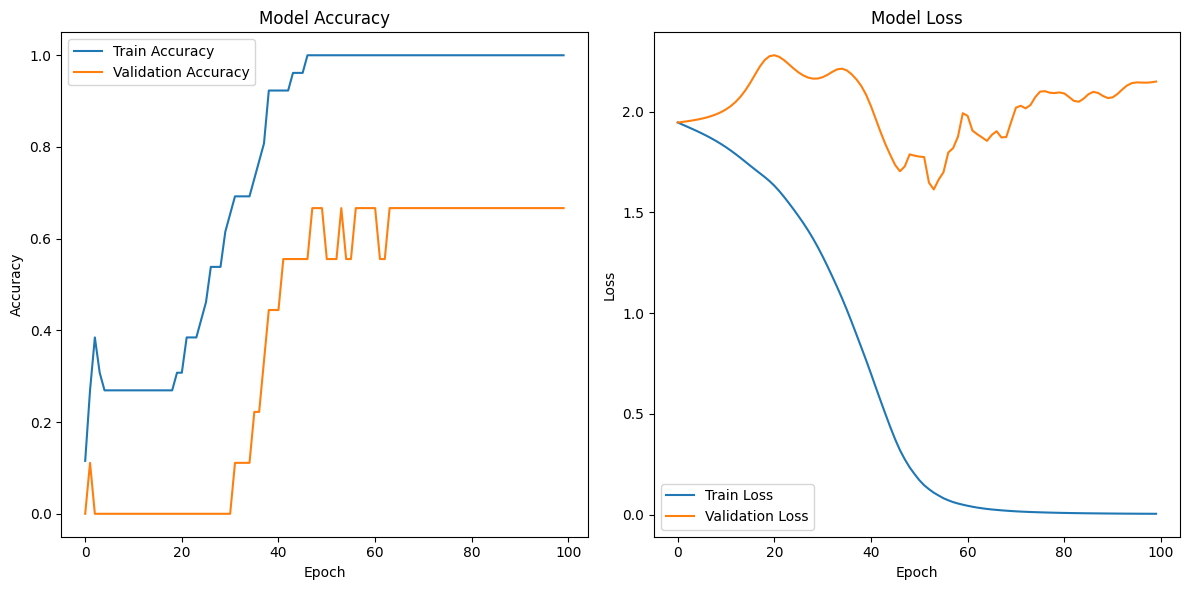

In [23]:
import json
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Učitavanje podataka iz JSON datoteke
dataset_path = 'dataset.json'
with open(dataset_path) as file:
    dataset = json.load(file)

# Izdvajanje uzoraka i oznaka iz podataka
patterns = []
labels = []
for intent in dataset['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern.lower())  # Pretvorba u mala slova
        labels.append(intent['tag'])

# Preprocesiranje podataka: lematizacija, uklanjanje stop riječi i brojeva
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizacija
    tokens = word_tokenize(text)
    # Lematizacija
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Uklanjanje stop riječi i brojeva
    tokens = [token for token in tokens if token.lower() not in stop_words and not token.isnumeric()]
    # Vraćanje preprocesiranog teksta kao spojene riječi
    return ' '.join(tokens)

patterns = [preprocess_text(pattern) for pattern in patterns]

# Pretvorba uzoraka u vektore značajki
tokenizer = Tokenizer()
tokenizer.fit_on_texts(patterns)
sequences = tokenizer.texts_to_sequences(patterns)
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
num_features = len(tokenizer.word_index) + 1

# Pretvorba oznaka u kategorizirane varijable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_labels = len(label_encoder.classes_)

# Podjela skupa na trening i test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.25, random_state=42)

# Izgradnja modela RNN
model = Sequential()
model.add(Embedding(num_features, 128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(num_labels, activation='softmax'))

# Kompilacija modela
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treniranje modela
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluacija modela
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Grafički prikaz tačnosti i gubitka tokom treninga
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# Testiranje modela
test_patterns = [
    "Hello",
    "Thank you",
    "How can I place an order?",
    "What payment methods do you accept?",
    "I want to return an item, how to do it?"
]

# Pretvorba testnih uzoraka u vektore značajki
test_sequences = tokenizer.texts_to_sequences(test_patterns)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Predviđanje oznaka za testne uzorke
predictions = model.predict(padded_test_sequences, verbose=0)

# Dekodiranje predviđenih oznaka
decoded_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Ispisivanje rezultata predviđanja
for pattern, label in zip(test_patterns, decoded_labels):
    print(f"Input: {pattern}")
    print(f"Predicted label: {label}")
    print("Response:", end=" ")
    for intent in dataset['intents']:
        if intent['tag'] == label:
            print(np.random.choice(intent['responses']))
            break
    print()

Input: Hello
Predicted label: greeting
Response: Good [morning/afternoon/evening]! How may I help you?

Input: Thank you
Predicted label: thanks
Response: No problem!

Input: How can I place an order?
Predicted label: order
Response: To place an order, please visit our website and select the items you wish to purchase. The standard delivery time is 3-5 business days. You can check the status of your order by logging into your account on our website. If you have any issues with your order, please contact our customer support team by phone or email.

Input: What payment methods do you accept?
Predicted label: payment
Response: You can pay for your order using credit cards, debit cards, PayPal, or Apple Pay. Our payment process is secure and your information is encrypted. Your payment will be processed within 24 hours. If you encounter any issues with your payment, please contact customer support via email or phone.

Input: I want to return an item, how to do it?
Predicted label: returns


In [ ]:
import nltk.translate.bleu_score as bleu
import time

# Funkcija za generiranje odgovora modela na pitanje
def generate_response(question):
    # Preprocesiranje upita
    question = preprocess_text(question.lower())
    # Tokenizacija i pretvorba u sekvencom
    sequence = tokenizer.texts_to_sequences([question])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    # Generiranje predikcije
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    # Pronalazak odgovora na temelju predikcije
    for intent in dataset['intents']:
        if intent['tag'] == predicted_label:
            responses = intent['responses']
            return np.random.choice(responses)

# Izračunavanje BLEU mjere
reference_corpus = []
generated_corpus = []
for intent in dataset['intents']:
    for pattern in intent['patterns']:
        reference_corpus.append(preprocess_text(pattern.lower()))
        generated_corpus.append(generate_response(pattern))

reference_corpus = [word_tokenize(text) for text in reference_corpus]
generated_corpus = [word_tokenize(text) for text in generated_corpus]

# Pretvaranje generiranog korpusa u listu stringova
generated_corpus = [' '.join(tokens) for tokens in generated_corpus]

bleu_score = bleu.corpus_bleu(reference_corpus, generated_corpus)
print('BLEU Score:', bleu_score)

# Izračunavanje distinctiveness mjere
unique_responses = set(generated_corpus)
distinctiveness = len(unique_responses) / len(generated_corpus)
print('Distinctiveness:', distinctiveness)

# Izračunavanje prosječnog vremena odgovora
total_response_time = 0
num_responses = 0
for pattern in patterns:
    start_time = time.time()
    generate_response(pattern)
    end_time = time.time()
    response_time = end_time - start_time
    total_response_time += response_time
    num_responses += 1

average_response_time = total_response_time / num_responses
print('Average Response Time:', average_response_time)


1/1 [==============================] - 0s 52ms/step
BLEU Score: 0.025498010605818182
Distinctiveness: 0.6285714285714286
1/1 [==============================] - 0s 51ms/step
Average Response Time: 0.10822584288460868


In [ ]:
from sklearn.metrics import classification_report

# Predviđanje vjerojatnosti za testni skup
y_pred_prob = model.predict(X_test)

# Pretvaranje vjerojatnosti u predviđene oznake
y_pred = np.argmax(y_pred_prob, axis=1)

# Dekodiranje predviđenih oznaka
predicted_labels = label_encoder.inverse_transform(y_pred)

# Izračunavanje F1, recall i preciznosti
report = classification_report(label_encoder.inverse_transform(y_test), predicted_labels)

# Ispis rezultata
print("Classification Report:\n", report)

1/1 [==============================] - 0s 22ms/step
Classification Report:
               precision    recall  f1-score   support

     goodbye       1.00      0.50      0.67         2
       order       0.50      1.00      0.67         2
     payment       0.00      0.00      0.00         2
     returns       1.00      1.00      1.00         2
      thanks       0.50      1.00      0.67         1

    accuracy                           0.67         9
   macro avg       0.60      0.70      0.60         9
weighted avg       0.61      0.67      0.59         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Funkcija za predviđanje odgovora na temelju unesenog teksta
def get_response(text):
    preprocessed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    predicted_label = np.argmax(model.predict(padded_sequence), axis=-1)
    tag = label_encoder.inverse_transform(predicted_label)[0]

    for intent in dataset['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
            response = np.random.choice(responses)
            return response

    return "I'm sorry, I didn't understand that."

# Primjer korištenja chatbota
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break

    response = get_response(user_input)
    print("ChatBot:", response)

User: hello
1/1 [==============================] - 0s 17ms/step
ChatBot: Hello, how may I assist you today?
User: exit


# **3. Transformeri**

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import nltk
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np

with open("dataset.json") as file:
    data = json.load(file)

# Preprocesiranje podataka: lematizacija, uklanjanje stop riječi i brojeva
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizacija
    tokens = word_tokenize(text)
    # Lematizacija
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Uklanjanje stop riječi i brojeva
    tokens = [token for token in tokens if token.lower() not in stop_words and not token.isnumeric()]
    # Vraćanje preprocesiranog teksta kao spojene riječi
    return ' '.join(tokens)

patterns = []
labels = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern.lower())
        labels.append(intent['tag'])

patterns = [preprocess_text(pattern) for pattern in patterns]

# Podjela na trening i testni skup
train_patterns, test_patterns, train_labels, test_labels = train_test_split(patterns, labels, test_size=0.2, random_state=42)

# Pretvaranje uzoraka u vektore značajki
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_sequences = tokenizer.batch_encode_plus(train_patterns, padding='longest', truncation=True, return_tensors='tf')
train_input_ids = train_sequences['input_ids']
train_attention_masks = train_sequences['attention_mask']

test_sequences = tokenizer.batch_encode_plus(test_patterns, padding='longest', truncation=True, return_tensors='tf')
test_input_ids = test_sequences['input_ids']
test_attention_masks = test_sequences['attention_mask']

# Pretvaranje oznaka u kategorizirane varijable
label_encoder = LabelEncoder()
train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)
num_labels = len(label_encoder.classes_)

# Izgradnja i treniranje BERT modela
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit([train_input_ids, train_attention_masks], train_encoded_labels, epochs=13, batch_size=256)

# Evaluacija modela na testnom skupu
test_loss, test_accuracy = model.evaluate([test_input_ids, test_attention_masks], test_encoded_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/13
1/1 [==============================] - 30s 30s/step - loss: 2.0204 - accuracy: 0.1429
Epoch 2/13
1/1 [==============================] - 2s 2s/step - loss: 1.8056 - accuracy: 0.3571
Epoch 3/13
1/1 [==============================] - 4s 4s/step - loss: 1.6533 - accuracy: 0.4286
Epoch 4/13
1/1 [==============================] - 2s 2s/step - loss: 1.5887 - accuracy: 0.5000
Epoch 5/13
1/1 [==============================] - 2s 2s/step - loss: 1.2545 - accuracy: 0.8571
Epoch 6/13
1/1 [==============================] - 2s 2s/step - loss: 1.0565 - accuracy: 0.9643
Epoch 7/13
1/1 [==============================] - 2s 2s/step - loss: 0.9151 - accuracy: 0.9286
Epoch 8/13
1/1 [==============================] - 3s 3s/step - loss: 0.7346 - accuracy: 0.9643
Epoch 9/13
1/1 [==============================] - 2s 2s/step - loss: 0.5503 - accuracy: 1.0000
Epoch 10/13
1/1 [==============================] - 2s 2s/step - loss: 0.4871 - accuracy: 0.9643
Epoch 11/13
1/1 [==============================

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predikcija na testnom skupu
predictions = model.predict([test_input_ids, test_attention_masks])
predicted_labels = np.argmax(predictions.logits, axis=1)

# Izračunavanje preciznosti, odziva i F1 mjere
precision = precision_score(test_encoded_labels, predicted_labels, average='weighted')
recall = recall_score(test_encoded_labels, predicted_labels, average='weighted')
f1 = f1_score(test_encoded_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 3s 3s/step
Precision: 0.7619047619047619
Recall: 0.7142857142857143
F1 Score: 0.7047619047619048


In [ ]:
import random

# Korištenje modela za generisanje odgovora
def generate_response(input_text, model, tokenizer):
    input_sequence = tokenizer.encode_plus(input_text.lower(), padding='longest', truncation=True, 
                                          max_length=128, return_tensors='tf')
    logits = model(input_sequence.input_ids)[0]
    predicted_class = tf.argmax(logits, axis=-1).numpy()[0]
    tag = label_encoder.inverse_transform([predicted_class])[0]

    # Pronalaženje odgovarajućeg skupa na temelju taga
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
            break
    
    # Odabir slučajnog odgovora iz skupa
    response = random.choice(responses)
    return response

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break

    response = generate_response(user_input,model,tokenizer)
    print("ChatBot:", response)

User: Hi
ChatBot: Hey there, how can I assist you?
User: How can I place an order
ChatBot: If you need assistance with placing an order, we're happy to help. You can reach out to us through our website's live chat or by phone and we'll guide you through the process. The estimated delivery time for orders is 7-10 business days. If you have any issues with your order, please let us know and we'll do our best to help you out.
User: How can I return a product
ChatBot: Our return policy allows you to return items within 30 days. To initiate a return, please fill out our online return form and follow the instructions provided. If you are eligible for a refund, it will be processed within 5-7 business days. If you received a damaged or incorrect item, please contact our customer support team at [email/phone number] and we'll assist you.
User: And what are methods of payment
ChatBot: We accept credit cards, debit cards, PayPal, and Apple Pay. Our payment process is secure and all transactions 

# **4. Random Forest**

In [17]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Učitavanje podataka iz JSON datoteke
with open("dataset.json") as file:
    data = json.load(file)

patterns = []
labels = []
responses = []

# Prikupljanje uzoraka, oznaka i odgovora iz podataka
for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern.lower())
        labels.append(intent['tag'])
    responses.extend(intent['responses'])

# Preprocesiranje teksta: lematizacija, uklanjanje stop riječi i tokenizacija
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token.lower() not in stop_words and not token.isnumeric()]
    return ' '.join(tokens)

patterns = [preprocess_text(pattern) for pattern in patterns]

# Podjela podataka na trening i testni skup
train_patterns, test_patterns, train_labels, test_labels = train_test_split(patterns, labels, test_size=0.2, random_state=42)

# Pretvaranje uzoraka u vektore značajki koristeći TF-IDF
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_patterns)
test_features = vectorizer.transform(test_patterns)

# Izgradnja i treniranje Random Forest modela
rf_model = RandomForestClassifier()
rf_model.fit(train_features, train_labels)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


RandomForestClassifier()

In [18]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Učitavanje podataka iz JSON datoteke
with open("dataset.json") as file:
    data = json.load(file)

patterns = []
labels = []
responses = []

# Prikupljanje uzoraka, oznaka i odgovora iz podataka
for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern.lower())
        labels.append(intent['tag'])
    responses.extend(intent['responses'])

# Preprocesiranje teksta: lematizacija, uklanjanje stop riječi i tokenizacija
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token.lower() not in stop_words and not token.isnumeric()]
    return ' '.join(tokens)

patterns = [preprocess_text(pattern) for pattern in patterns]

# Podjela podataka na trening i testni skup
train_patterns, test_patterns, train_labels, test_labels = train_test_split(patterns, labels, test_size=0.2, random_state=42)

# Pretvaranje uzoraka u vektore značajki koristeći TF-IDF
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_patterns)
test_features = vectorizer.transform(test_patterns)

# Izgradnja i treniranje Random Forest modela
rf_model = RandomForestClassifier()
rf_model.fit(train_features, train_labels)

# Evaluacija modela na testnom skupu
predictions = rf_model.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7142857142857143
Precision: 0.7619047619047619
Recall: 0.7142857142857143
F1-score: 0.7047619047619048


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import random

# Korištenje modela za generisanje odgovora
def generate_response(input_text, model, vectorizer):
    input_text = preprocess_text(input_text)
    input_vector = vectorizer.transform([input_text])
    predicted_class = model.predict(input_vector)[0]
    
    # Pronalaženje odgovarajućeg skupa odgovora na temelju predviđene klase
    response_set = [response for tag, response in zip(labels, responses) if tag == predicted_class]
    
    # Nasumičan odabir odgovora iz skupa
    response = random.choice(response_set) if response_set else "I'm sorry, I don't have an appropriate response."
    return response

In [20]:

# Evaluacija modela na testnom skupu
predictions = rf_model.predict(test_features)
accuracy = (predictions == test_labels).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break

    response = generate_response(user_input, rf_model, vectorizer)
    print("ChatBot:", response)

User: Hiiiii
ChatBot: Hi! How can I help you today?
User: How can I place an order
ChatBot: To place an order, please visit our website and select the items you wish to purchase. The standard delivery time is 3-5 business days. You can check the status of your order by logging into your account on our website. If you have any issues with your order, please contact our customer support team by phone or email.
User: Thank you
ChatBot: Anytime!
User: Bye
ChatBot: Bye, take care!
User: exit


# 5. CNN

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import nltk
from tensorflow.keras.optimizers import Adam
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np

# Učitavanje podataka
with open("dataset.json") as file:
    data = json.load(file)

# Preprocesiranje podataka: lematizacija, uklanjanje stop riječi i brojeva
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizacija
    tokens = word_tokenize(text)
    # Lematizacija
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Uklanjanje stop riječi i brojeva
    tokens = [token for token in tokens if token.lower() not in stop_words and not token.isnumeric()]
    # Vraćanje preprocesiranog teksta kao spojene riječi
    return ' '.join(tokens)

patterns = []
labels = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern.lower())
        labels.append(intent['tag'])

patterns = [preprocess_text(pattern) for pattern in patterns]

# Podjela na trening i testni skup
train_patterns, test_patterns, train_labels, test_labels = train_test_split(patterns, labels, test_size=0.2)

# Tokenizacija i pretvorba uzoraka u sekvence
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_patterns)
train_sequences = tokenizer.texts_to_sequences(train_patterns)
test_sequences = tokenizer.texts_to_sequences(test_patterns)

# Podešavanje maksimalne duljine sekvence
max_length = max(len(seq) for seq in train_sequences)
vocab_size = len(tokenizer.word_index) + 1

# Povećavanje duljine sekvence
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Pretvorba oznaka u kategorizirane varijable
label_encoder = LabelEncoder()
train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)
num_labels = len(label_encoder.classes_)

# Izgradnja CNN modela
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

# Kompilacija i treniranje modela s prilagođenom stopom učenja
learning_rate = 2e-4 
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(train_sequences, train_encoded_labels, epochs=300, batch_size=128)

# Evaluacija modela na testnom skupu
test_loss, test_accuracy = model.evaluate(test_sequences, test_encoded_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/300


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 1s 688ms/step - loss: 1.9459 - accuracy: 0.1429
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 1.9416 - accuracy: 0.2143
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 1.9396 - accuracy: 0.1429
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 1.9400 - accuracy: 0.1786
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 1.9339 - accuracy: 0.2500
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 1.9326 - accuracy: 0.2857
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.9256 - accuracy: 0.2857
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.9261 - accuracy: 0.3214
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 1.9237 - accuracy: 0.3214
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 1.9245 - accuracy: 0.1071
Epoch 11/300
1/1 [==============

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predikcija na testnom skupu
predictions = model.predict(test_sequences)
predicted_labels = np.argmax(predictions, axis=1)

# Dekodiranje predikcija
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Računanje metrika
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

# Ispis metrika
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 0s 57ms/step
Precision: 0.47619047619047616
Recall: 0.5714285714285714
F1 Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import random

# Korištenje modela za generisanje odgovora
def generate_response(input_text, model, tokenizer):
    input_sequence = tokenizer.texts_to_sequences([input_text.lower()])
    input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')
    logits = model.predict(input_sequence)[0]
    predicted_class = np.argmax(logits)
    tag = label_encoder.inverse_transform([predicted_class])[0]

    # Pronalaženje odgovarajućeg skupa na temelju taga
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
            break
    
    # Odabir slučajnog odgovora iz skupa
    response = random.choice(responses)
    return response

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break

    response = generate_response(user_input,model,tokenizer)
    print("ChatBot:", response)

User: Hello
1/1 [==============================] - 0s 33ms/step
ChatBot: Hello, how may I assist you today?
User: Help me
1/1 [==============================] - 0s 23ms/step
ChatBot: If you have any questions or need help with anything, our customer support team is here for you. You can reach us 24/7 by phone, email, or live chat.
User: How can I place an order
1/1 [==============================] - 0s 28ms/step
ChatBot: If you need assistance with placing an order, we're happy to help. You can reach out to us through our website's live chat or by phone and we'll guide you through the process. The estimated delivery time for orders is 7-10 business days. If you have any issues with your order, please let us know and we'll do our best to help you out.
User: Thank you
1/1 [==============================] - 0s 26ms/step
ChatBot: No problem!
User: Bye
1/1 [==============================] - 0s 45ms/step
ChatBot: Goodbye, have a great day!
User: exit
